In [1]:
pip install pandas

In [2]:
pip install numpy

In [3]:
pip install seaborn

# Pertemuan 3 Menelaah Data

In [4]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

CPU times: user 1.06 s, sys: 135 ms, total: 1.19 s
Wall time: 1.46 s


In [5]:
fordGB = pd.read_csv('/content/fordgobike-tripdataFor201902.csv')
fordGB.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
fordGB.nunique()

,0
duration_sec,4752
start_time,35783
end_time,35767
start_station_id,329
start_station_name,329
start_station_latitude,334
start_station_longitude,335
end_station_id,329
end_station_name,329
end_station_latitude,335


In [7]:
fordGB.shape
print(f"Jumlah Kolom: {fordGB.shape[1]}")
print(f"Jumlah Baris: {fordGB.shape[0]}")

Jumlah Kolom: 16
Jumlah Baris: 183416


In [8]:
fordGB.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,197
start_station_name,197
start_station_latitude,0
start_station_longitude,0
end_station_id,197
end_station_name,197
end_station_latitude,0


In [9]:
misspercent=(fordGB.isnull().sum()/len(fordGB))*100
misspercent

,0
duration_sec,0.000000
start_time,0.000000
end_time,0.000000
start_station_id,0.107406
start_station_name,0.107406
start_station_latitude,0.000000
start_station_longitude,0.000000
end_station_id,0.107406
end_station_name,0.107406
end_station_latitude,0.000000


<Axes: >

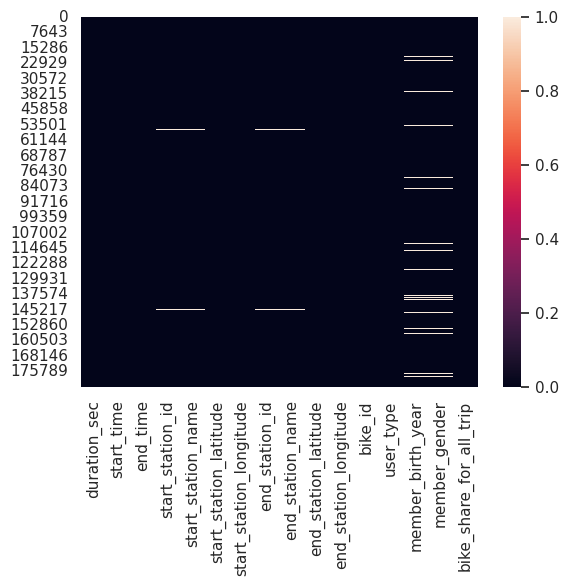

In [10]:
sns.heatmap(fordGB.isnull())

# Pertemuan 4 Validasi Data

In [12]:
fordGB = fordGB.dropna(how="any", subset=['start_station_id'])
fordGB = fordGB.dropna(how="any", subset=['start_station_name'])
fordGB = fordGB.dropna(how="any", subset=['end_station_id'])
fordGB = fordGB.dropna(how="any", subset=['end_station_name'])
fordGB = fordGB.dropna(how="any", subset=['member_birth_year'])
fordGB = fordGB.dropna(how="any", subset=['member_gender'])

print(fordGB.isnull().sum())
print(f"Jumlah Kolom: {fordGB.shape[1]}")
print(f"Jumlah Baris: {fordGB.shape[0]}")

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64
Jumlah Kolom: 16
Jumlah Baris: 174956


<Axes: >

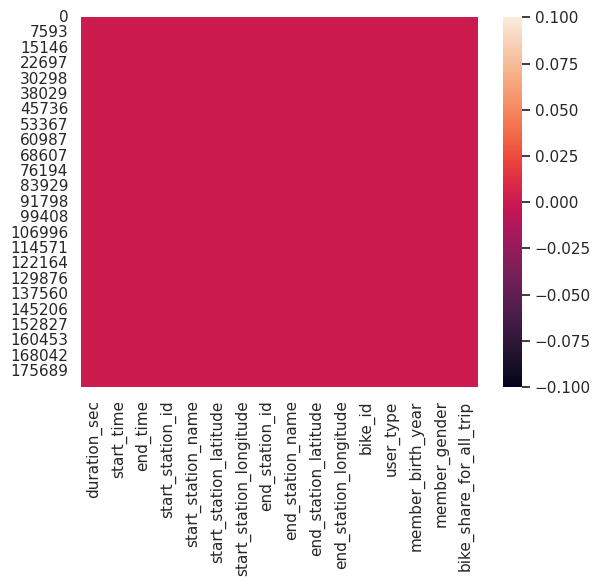

In [13]:
sns.heatmap(fordGB.isnull())

In [14]:
fordGB_copy = fordGB.copy()
print(f"Jumlah Kolom Data Copy: {fordGB_copy.shape[1]}")
print(f"Jumlah Baris Data Copy: {fordGB_copy.shape[0]}")

Jumlah Kolom Data Copy: 16
Jumlah Baris Data Copy: 174956


In [16]:
fordGB.describe(include="all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,174956.000000,174956,174956,174956.000000,174956,174956.000000,174956.000000,174956.000000,174956,174956.000000,174956.000000,174956.000000,174956,174956.000000,174956,174956
unique,NaN,35732,35717,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,33:48.5,22:24.4,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,15,19,NaN,3649,NaN,NaN,NaN,4624,NaN,NaN,NaN,158390,NaN,130504,157609
mean,703.991586,NaN,NaN,139.002052,NaN,37.771218,-122.351758,136.604769,NaN,37.771412,-122.351333,4482.570441,NaN,1984.803202,NaN,NaN
std,1642.187831,NaN,NaN,111.648900,NaN,0.100395,0.117736,111.335413,NaN,0.100300,0.117298,1659.198968,NaN,10.118631,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453705,3.000000,NaN,37.317298,-122.453705,11.000000,NaN,1878.000000,NaN,NaN
25%,323.000000,NaN,NaN,47.000000,NaN,37.770407,-122.411901,44.000000,NaN,37.770407,-122.411647,3799.000000,NaN,1980.000000,NaN,NaN
50%,510.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398279,101.000000,NaN,37.781010,-122.397437,4960.000000,NaN,1987.000000,NaN,NaN
75%,789.000000,NaN,NaN,239.000000,NaN,37.797320,-122.283093,238.000000,NaN,37.797673,-122.286533,5505.000000,NaN,1992.000000,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x7a9888d57040>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9888d57580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9888d56da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9888d57ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9888d57d60>],
 'means': []}

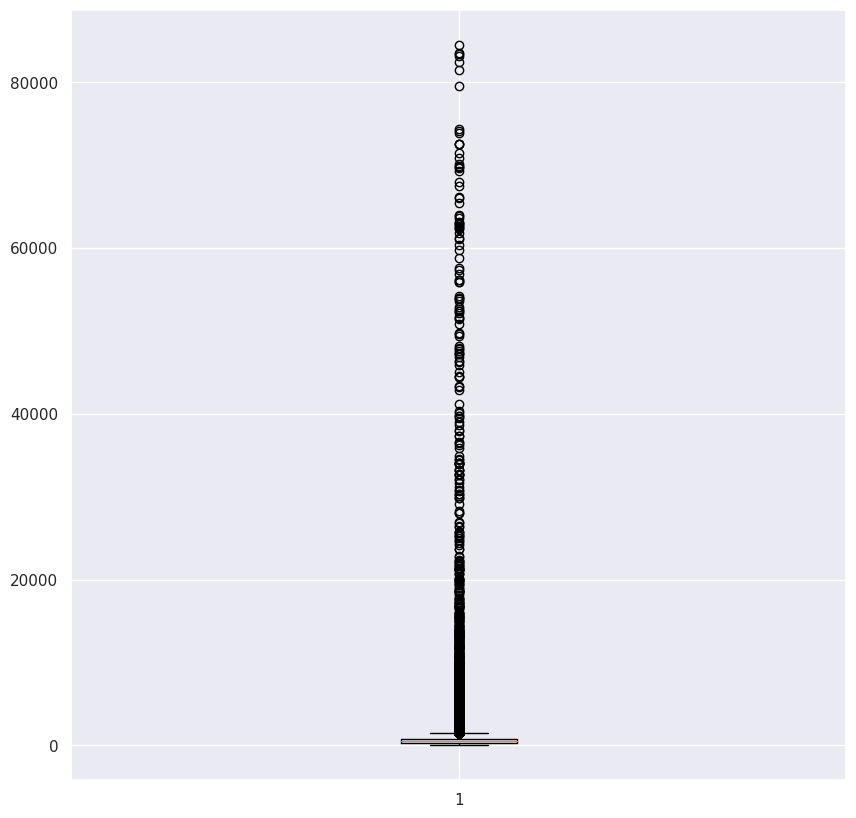

In [17]:
plt.figure(figsize=(10,10))
plt.boxplot(fordGB_copy["duration_sec"])

In [18]:
# persamaan 1
Q1 = fordGB_copy["duration_sec"].quantile(0.25)
Q3 = fordGB_copy["duration_sec"].quantile(0.75)
IQR = Q3 - Q1

# persamaan 2
outlierQ3 = Q3 + (1.5 * IQR)
# outlierQ1 = Q1 - (1.5 * IQR)

# membuang data outlier
fordGB_copy = fordGB_copy[fordGB_copy["duration_sec"] < outlierQ3]
fordGB_copy["duration_sec"].describe()

,duration_sec
count,165610.000000
mean,550.095840
std,304.148098
min,61.000000
25%,314.000000
50%,488.000000
75%,731.000000
max,1487.000000


In [19]:
print(f"Jumlah Kolom data_copy: {fordGB_copy.shape[1]}")
print(f"Jumlah Baris data_copy: {fordGB_copy.shape[0]}")

Jumlah Kolom data_copy: 16
Jumlah Baris data_copy: 165610


{'whiskers': [<matplotlib.lines.Line2D at 0x7a9888c493c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9888c49900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9888c49120>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9888c49e40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9888c4a0e0>],
 'means': []}

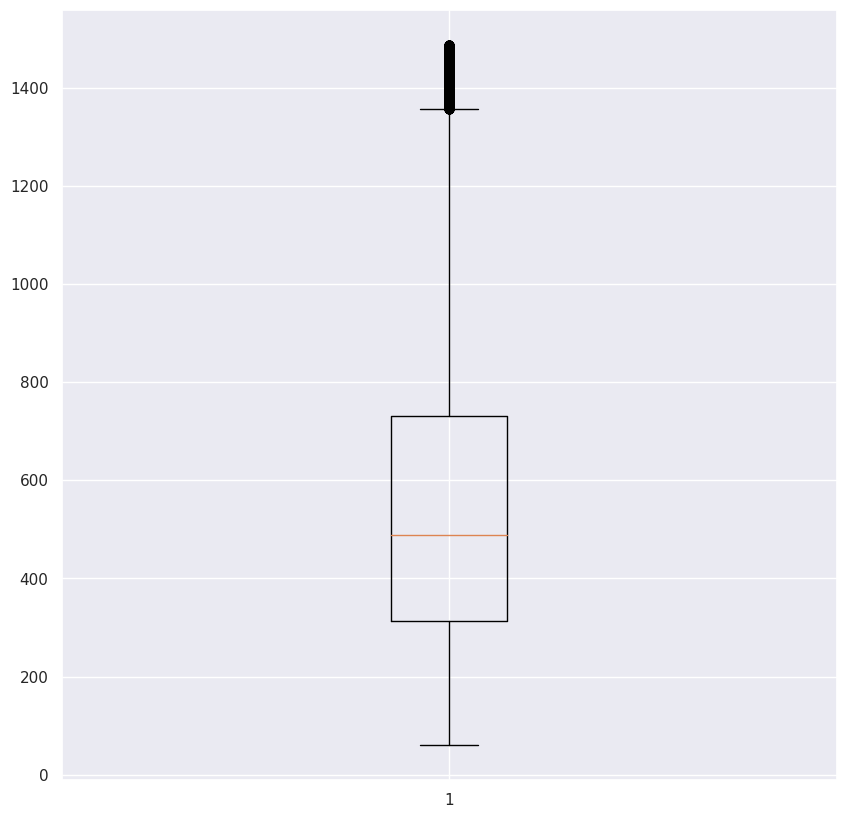

In [20]:
plt.figure(figsize=(10,10))
plt.boxplot(fordGB_copy["duration_sec"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9888a06920>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9888a07b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9888a07040>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9888a07fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9888a05ae0>],
 'means': []}

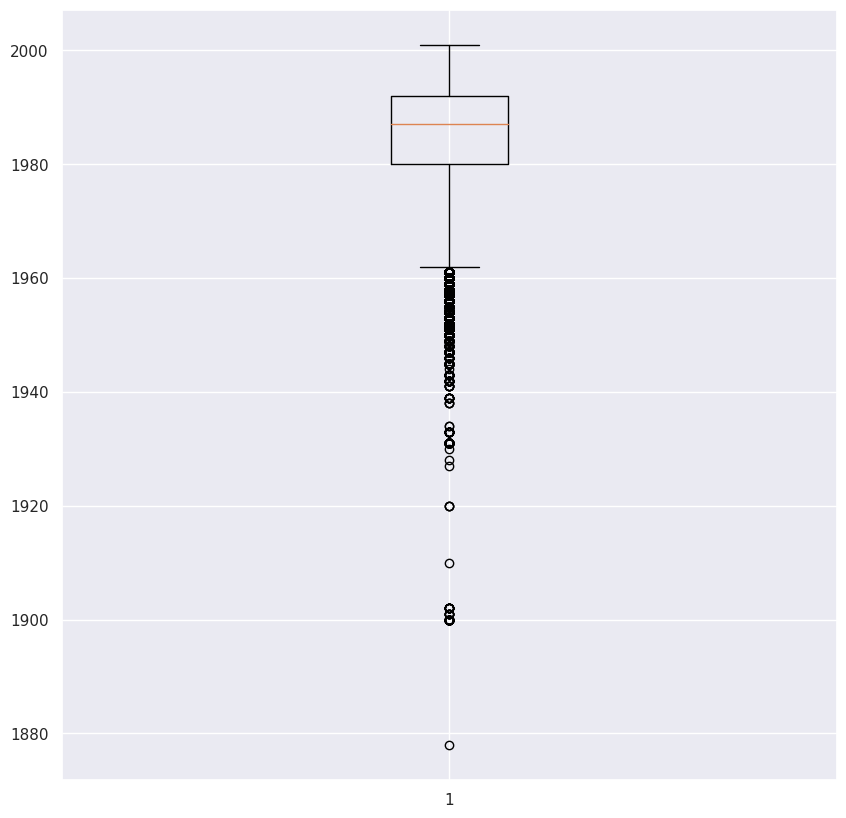

In [21]:
plt.figure(figsize=(10,10))
plt.boxplot(fordGB_copy["member_birth_year"])

In [22]:
# persamaan 1
Q1 = fordGB_copy["member_birth_year"].quantile(0.25)
Q3 = fordGB_copy["member_birth_year"].quantile(0.75)
IQR = Q3 - Q1

# persamaan 3
outlierQ1 = Q1 - (1.5 * IQR)

# membuang data outlier
fordGB_copy = fordGB_copy[fordGB_copy["member_birth_year"] > outlierQ1]
fordGB_copy["member_birth_year"].describe()

,member_birth_year
count,159433.000000
mean,1985.948279
std,8.300881
min,1963.000000
25%,1981.000000
50%,1988.000000
75%,1992.000000
max,2001.000000


In [23]:
print(f"Jumlah Kolom Data Copy: {fordGB_copy.shape[1]}")
print(f"Jumlah Baris Data Copy: {fordGB_copy.shape[0]}")

Jumlah Kolom Data Copy: 16
Jumlah Baris Data Copy: 159433


{'whiskers': [<matplotlib.lines.Line2D at 0x7a9888b212a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9888b208b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9888b21960>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9888b20d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9888b22500>],
 'means': []}

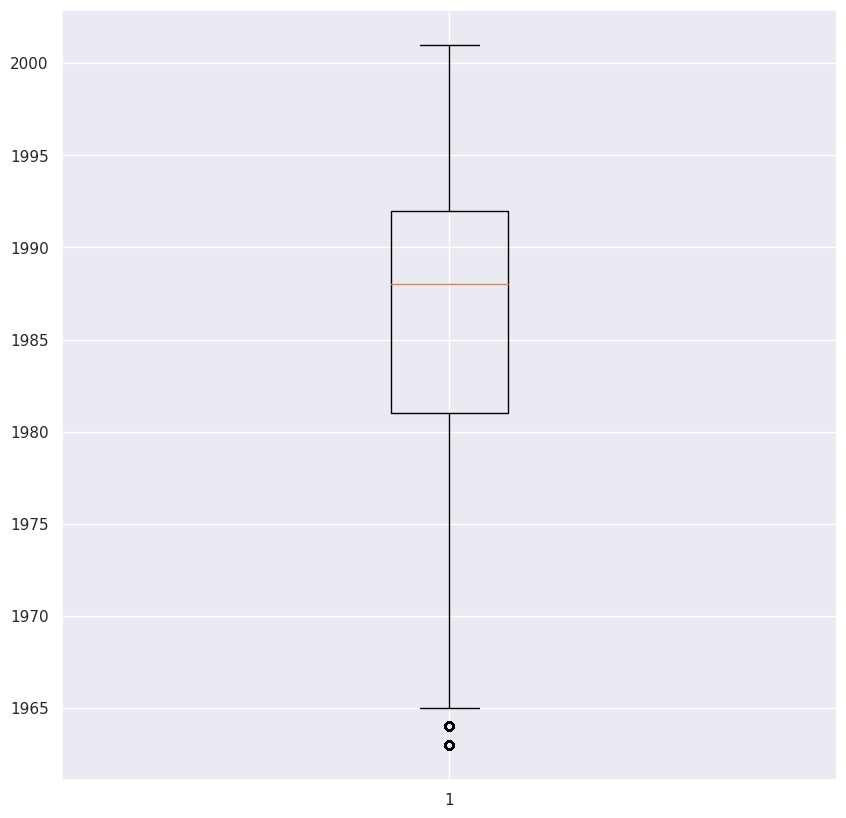

In [24]:
plt.figure(figsize=(10,10))
plt.boxplot(fordGB_copy["member_birth_year"])

In [25]:
fordGB_copy.describe(include="all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,159433.000000,159433,159433,159433.000000,159433,159433.000000,159433.000000,159433.000000,159433,159433.000000,159433.000000,159433.000000,159433,159433.000000,159433,159433
unique,NaN,35596,35573,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,55:46.9,22:24.4,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,15,18,NaN,3478,NaN,NaN,NaN,4474,NaN,NaN,NaN,146135,NaN,119051,144140
mean,548.809795,NaN,NaN,138.845998,NaN,37.770419,-122.350634,135.954238,NaN,37.770584,-122.350102,4487.180232,NaN,1985.948279,NaN,NaN
std,302.994382,NaN,NaN,110.808220,NaN,0.102105,0.119234,110.161727,NaN,0.102006,0.118735,1654.570987,NaN,8.300881,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453705,3.000000,NaN,37.317298,-122.453705,11.000000,NaN,1963.000000,NaN,NaN
25%,313.000000,NaN,NaN,49.000000,NaN,37.770083,-122.411738,44.000000,NaN,37.770407,-122.411306,3824.000000,NaN,1981.000000,NaN,NaN
50%,487.000000,NaN,NaN,104.000000,NaN,37.780526,-122.397437,100.000000,NaN,37.780955,-122.397086,4960.000000,NaN,1988.000000,NaN,NaN
75%,729.000000,NaN,NaN,239.000000,NaN,37.797320,-122.280192,233.000000,NaN,37.797320,-122.283093,5505.000000,NaN,1992.000000,NaN,NaN


In [26]:
fordGB_copy.duplicated()

,0
6,False
9,False
10,False
11,False
12,False
...,...
183411,False
183412,True
183413,True
183414,True


In [28]:
fordGB_copy = fordGB_copy.drop_duplicates()
print(f"Jumlah Kolom Data Copy: {fordGB_copy.shape[1]}")
print(f"Jumlah Baris Data Copy: {fordGB_copy.shape[0]}")

Jumlah Kolom Data Copy: 16
Jumlah Baris Data Copy: 159429


In [29]:
fordGB_copy.to_csv('fordGB_data_clean.csv')